### Name : Harsh Sanjay Agrawal
### CWID : 10475285 
### email: hagrawa1@stevens.edu 

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the data from homework_data.csv file and set the column Student_Id as the index of the dataframe. The data contains the student id and grade he/she took in CS 556.
df = pd.read_csv("homework_data.csv")
print(df.head())

   Student_Id  Grades
0           0    74.0
1           1    85.0
2           2    70.0
3           3    81.0
4           4    83.0


In [3]:
# Sum of integer and floating points are same, meaning there are no float values in the grade columns, all are whole numbers
print(df["Grades"].sum(),df["Grades"].astype(int).sum())

79617.0 79617


In [4]:
#Computing the mean and standard deviation of the grades
mean = df["Grades"].mean()
std = df["Grades"].std()
print("Mean is: ", mean)
print("Std is: ", std)

Mean is:  79.617
Std is:  12.252364320058044


In [5]:
#Perform the normal test to check whether the data is normally distributed
k2, p = ss.normaltest(df["Grades"])
if p > 0.05:
    print("Yes the data is normally distributed")
else:
    print("No the data is not normally distributed")

Yes the data is normally distributed


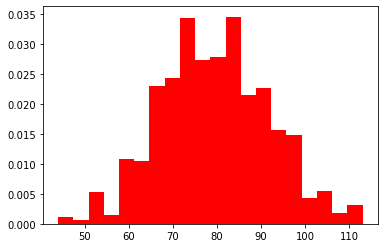

In [6]:
#plot the histogram of grades containing 20 bins. The output should be like the plot shown below. 
count, bins, ignored = plt.hist(df["Grades"], bins = 20, density=True, stacked=True, color = 'r')

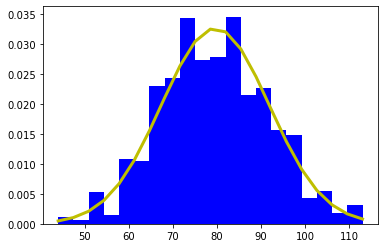

In [7]:
#plot the probability density as histogram in blue and the probabability density function as a curve in yellow as shown below.
count, bins, ignored = plt.hist(df["Grades"], bins = 20, density=True, stacked=True, color = 'b')

plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2)),linewidth=3, color='y')
plt.show()

In [8]:
#Create model that would generated grades of students assuming they are normally distributed with mean and std coming from the dataset we used above.
rv = ss.norm(mean, std)

### Answer the following questions using the above declared model named rv

1. Find the probability that a randomly selected student from this class has a test score that is less than 92 <br>
P(Grades <= 92)

In [9]:
prob = rv.cdf(92)
print("Probability that a random student would take less than 92 is: ", prob)

Probability that a random student would take less than 92 is:  0.8439109037725568


2. Find the probability that a randomly selected student from this class has a test score that between 80 and 90. <br>
P(Grades between 80 and 90) = P(Grades <= 90) - P(Grades <= 80 )

In [10]:
prob = rv.cdf(90) - rv.cdf(80)
print("Probability that a random student would take a grade between 80 and 90 is: ", prob)

Probability that a random student would take a grade between 80 and 90 is:  0.28915316095987564


3. Find the probability that a randomly selected student from this class has a test score that greater than 70. <br>
P(Grades higher than 70) = 1 - P(Grades <= 70)

In [11]:
prob = 1 - rv.cdf(70)
print("Probability that a random student would take a grade greater than 70 is ", prob)

Probability that a random student would take a grade greater than 70 is  0.783746752299991


4. Find the test score that separates the bottom 30% from the top 70% <br>
Test score that seperates bottom 30% of the students from top 70% of the students lies at 30% probability.

In [12]:
grade = rv.ppf(0.3)
print("The test scores that separetes the bottom 30% from the top 70% is ", grade)

The test scores that separetes the bottom 30% from the top 70% is  73.19185386867586


5. If a student scores in the top 10% of all test scores, her test score is at least what? <br>
Test score appears in top 10% meaning bottom 90% probabilities are excluded

In [13]:
grade = rv.ppf(0.9)
print("If a student scores in the top 10% of all test scores, her test score is at least ", grade)

If a student scores in the top 10% of all test scores, her test score is at least  95.31903667599319


6. What range of test scores constitutes the middle 50%? <br>
Marking the middle at mean, a range of 50% would go from 25% to 75% of the given data

In [14]:
grade = rv.ppf(0.25), rv.ppf(0.75)
print( grade , " constitutes the middle 50% of the test scores")

(71.35290585045267, 87.88109414954734)  constitutes the middle 50% of the test scores


# I pledge my honour that I have abided by the Steven's Code of Honour